# 0. Importation des librairies utiles et des données

***À exécuter*** *en premier lieu pour le bon fonctionnement du reste du notebook. La suite des cellules est à exécuter dans leur ordre d'apparition.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_MODEL = pd.read_excel('MODEL.xlsx', header=[0, 1], index_col=[0, 1])
df_FLOWS = pd.read_excel('FLOWS.xlsx', header=[0, 1], index_col=[0, 1])
df_CHARACTERIZATION = pd.read_excel('CHARACTERIZATION.xlsx', header=[0, 1], index_col=[0, 1])
df_NORMALIZATION = pd.read_excel('NORMALIZATION.xlsx', header=[0], index_col=[0, 1])
df_WEIGHTING = pd.read_excel('WEIGHTING.xlsx', header=[0], index_col=[0])

MODEL = np.array(df_MODEL)
MODEL[np.isnan(MODEL)] = 0
FLOWS = np.array(df_FLOWS)
CHARACTERIZATION = np.array(df_CHARACTERIZATION)
NORMALIZATION = np.array(df_NORMALIZATION)
WEIGHTING = np.array(df_WEIGHTING)[:,0]

# Custom color map
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
custom_colors = np.array([[0,0,120,255],[30,144,230,255],[0,0,200,255],[100,149,237,255],[0,0,255,255],[70,130,180,255],                  # Production
                 [255,80,0,255],[255,140,0,255],[255,140,0,255],                                                                          # Transport
                 [0,128,0,255],[0,128,0,255],                                                                                             # Utilisation
                 [240,0,0,255],[139,0,0,255],[250,128,114,255],[220,20,60,255],[178,34,34,255],[205,92,92,255],[240,128,128,255]])/255    # Fin de vie
custom_cmp = ListedColormap(custom_colors)

print("\nImportation OK !")


Importation OK !


# 1. ACV simplifiée

*Cette cellule calcule et affiche les valeurs absolues des **impacts caractérisés** pour tous les indicateurs environnementaux de la méthode EF 3.0, puis affiche le graphe de contribution des différentes étapes du cycle de vie (Production, Distribution, Utilisation et Fin de vie) pour chaque catégorie d'impacts.*

***Rien à modifier.***

RESULTATS:
32.01	kg CO2 eq	Climate change
0.00	kg CFC11 eq	Ozone depletion
3.82	kBq U-235 eq	Ionising radiation
0.06	kg NMVOC eq	Photochemical ozone formation
0.00	disease inc.	Particulate matter
0.00	CTUh		Human toxicity, non-cancer
0.00	CTUh		Human toxicity, cancer
0.07	mol H+ eq	Acidification
0.03	kg P eq		Eutrophication, freshwater
0.02	kg N eq		Eutrophication, marine
0.25	mol N eq	Eutrophication, terrestrial
1513.02	CTUe		Ecotoxicity, freshwater
157.91	Pt		Land use
6.75	m3 depriv.	Water use
468.26	MJ		Resource use, fossils
0.01	kg Sb eq	Resource use, minerals and metals



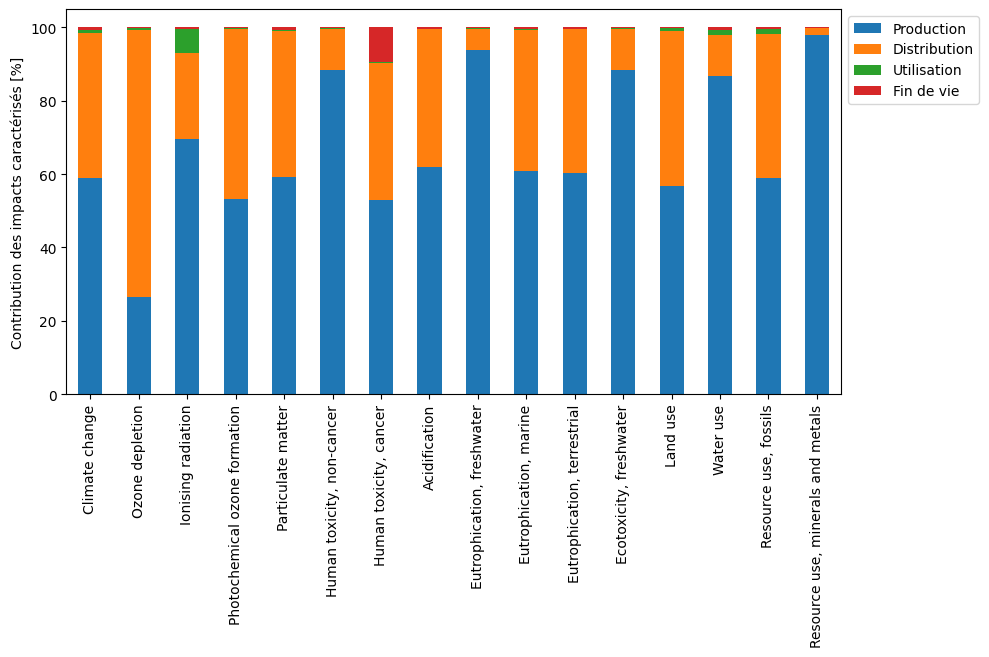

In [2]:
## Quantités des procédés d'avant-plan dans le scénario de base
FOREGROUND_base = np.array([0.100,0.009,0.022,0.025,0.055,0.035,0.246,40,0,2.871,0,0.100,0.055,0.035,0.056,0,0,0])

## Etapes du cycle de vie
STAGES = np.array([[1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],     # Production
                   [0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0],      # Transport
                   [0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],      # Utilisation
                   [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1]])     # Fin de vie

## Caractérisation des impacts
IMPACTS = STAGES @ np.diag(FOREGROUND_base) @ MODEL @ FLOWS @ CHARACTERIZATION

## Affichage des valeurs absolues des impacts caractérisés
impacts_sum = np.sum(IMPACTS,axis=0)
impacts_text = ["%.2f" % x for x in impacts_sum]
impacts_unit = np.array(df_CHARACTERIZATION.columns.get_level_values(1), dtype='U')
impacts_name = np.array(df_CHARACTERIZATION.columns.get_level_values(0), dtype='U')
tabs = np.array(['\t','\t','\t','\t','\t','\t\t','\t\t','\t','\t\t','\t\t','\t','\t\t','\t\t','\t','\t\t','\t'])
D = np.char.add(np.char.add(np.char.add(np.char.add(np.char.add(impacts_text,'\t'),impacts_unit),tabs),impacts_name),'\n')
print('RESULTATS:')
print(''.join(D.tolist()))

## Graphe de contribution des impacts caractérisés
df_IMPACTS = pd.DataFrame(100*IMPACTS.T/np.sum(IMPACTS,axis=0)[:,None],columns=['Production','Distribution','Utilisation','Fin de vie'],index=df_CHARACTERIZATION.columns.get_level_values(0))
df_IMPACTS.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.ylabel('Contribution des impacts caractérisés [%]')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# 2. ACV détaillée

### **2.1 Visualisation des matrices de données brutes**

*Cette cellule affiche le "sparsity pattern" des vecteurs et matrices utilisées pour calculer les résultats de l'ACV : FOREGROUND, MODEL, FLOWS, CHARACTERIZATION, NORMALIZATION et WEIGHTING.*

***Rien à modifier.***

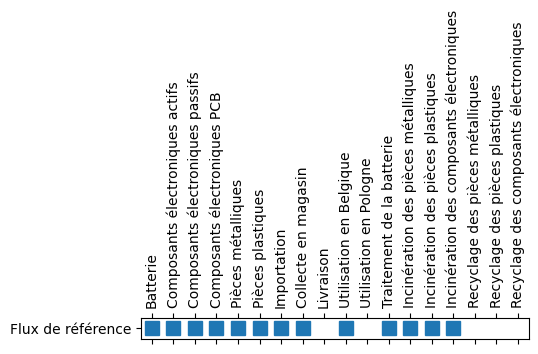

FOREGROUND: Lignes x Colonnes = 1 x 18



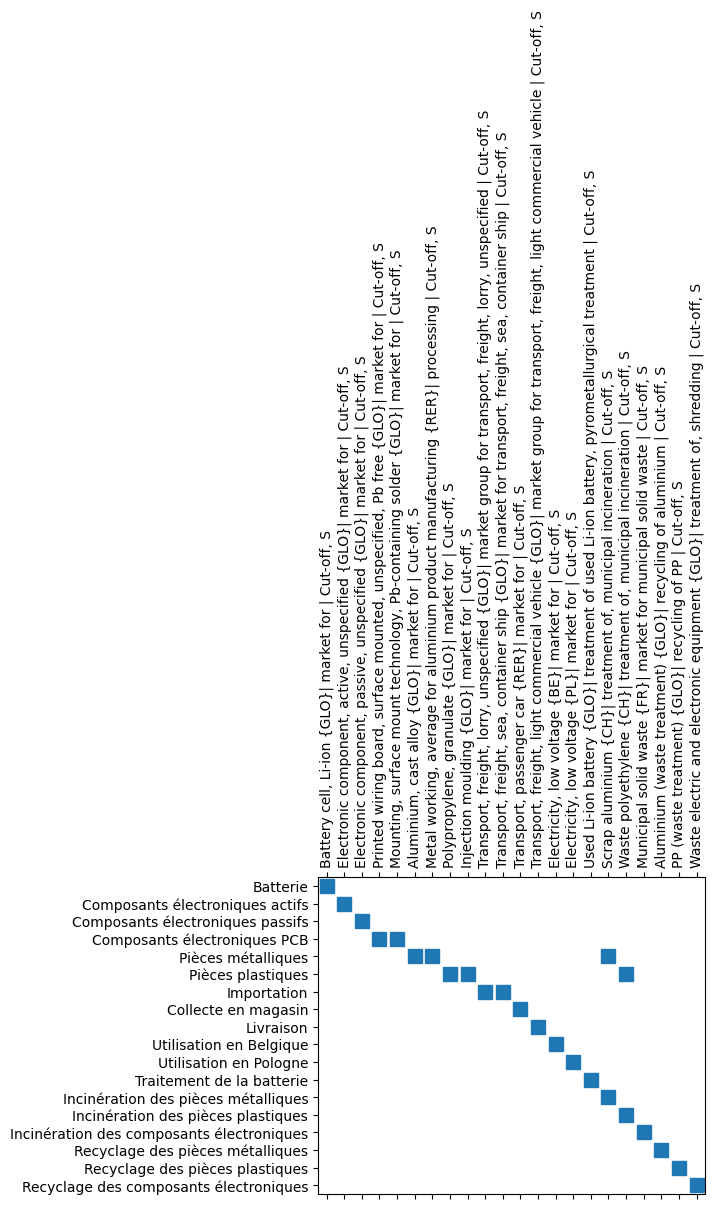

MODEL: Lignes x Colonnes = 18 x 22



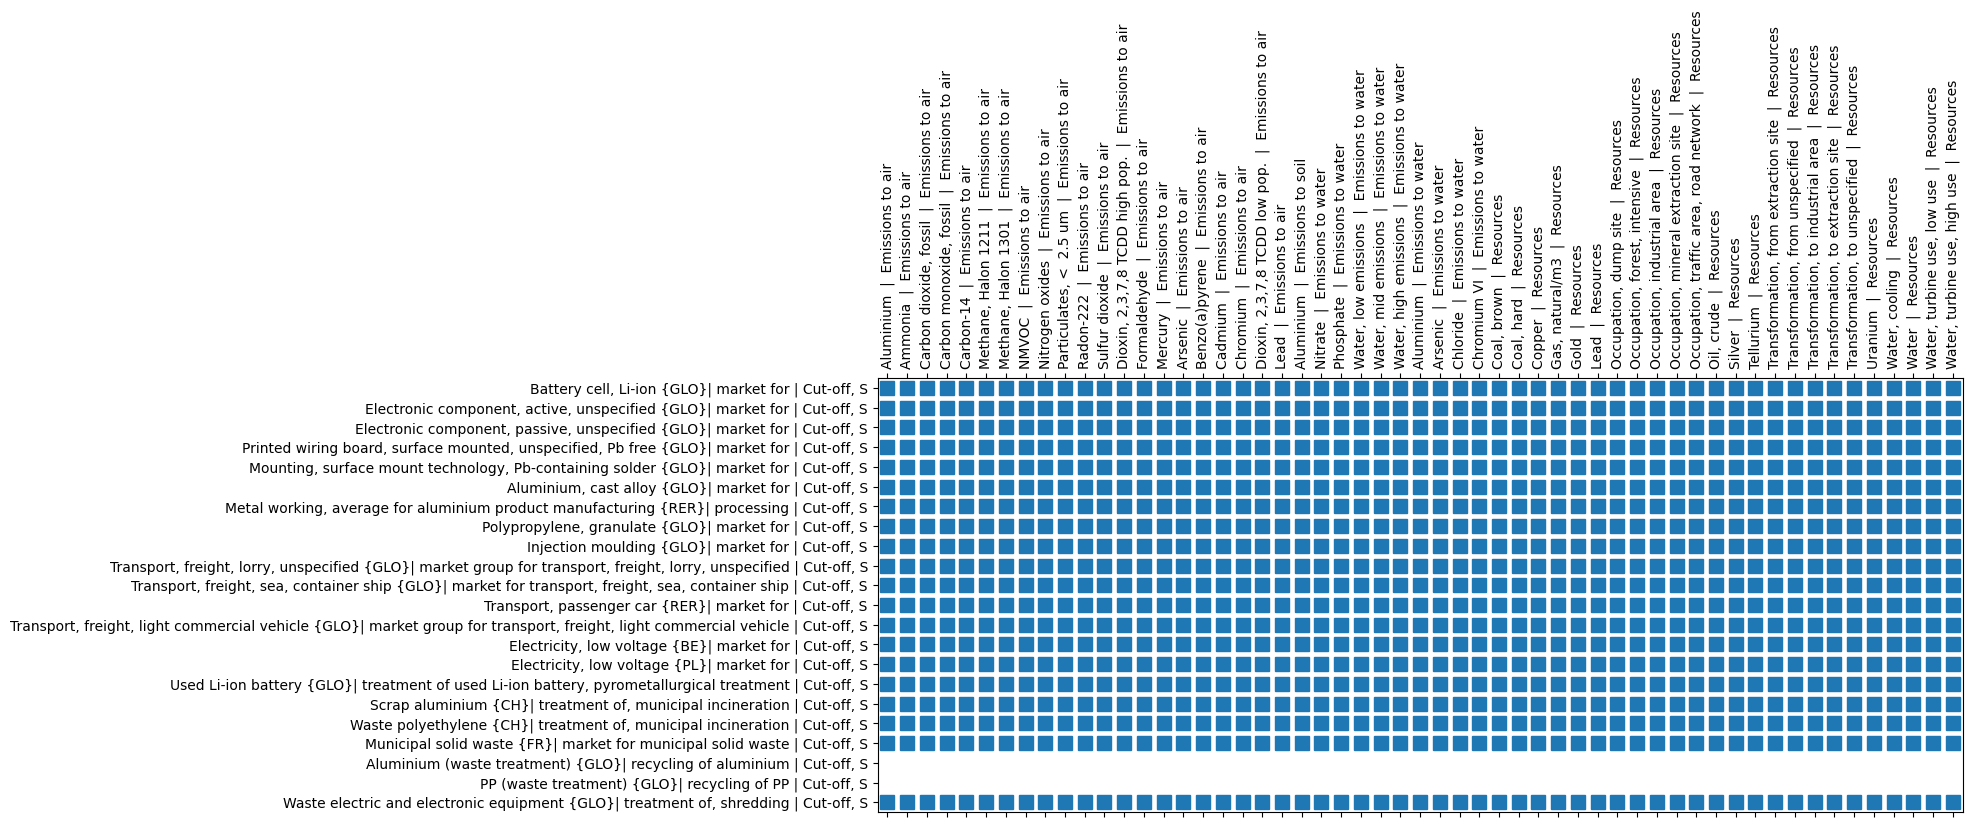

FLOWS: Lignes x Colonnes = 22 x 55



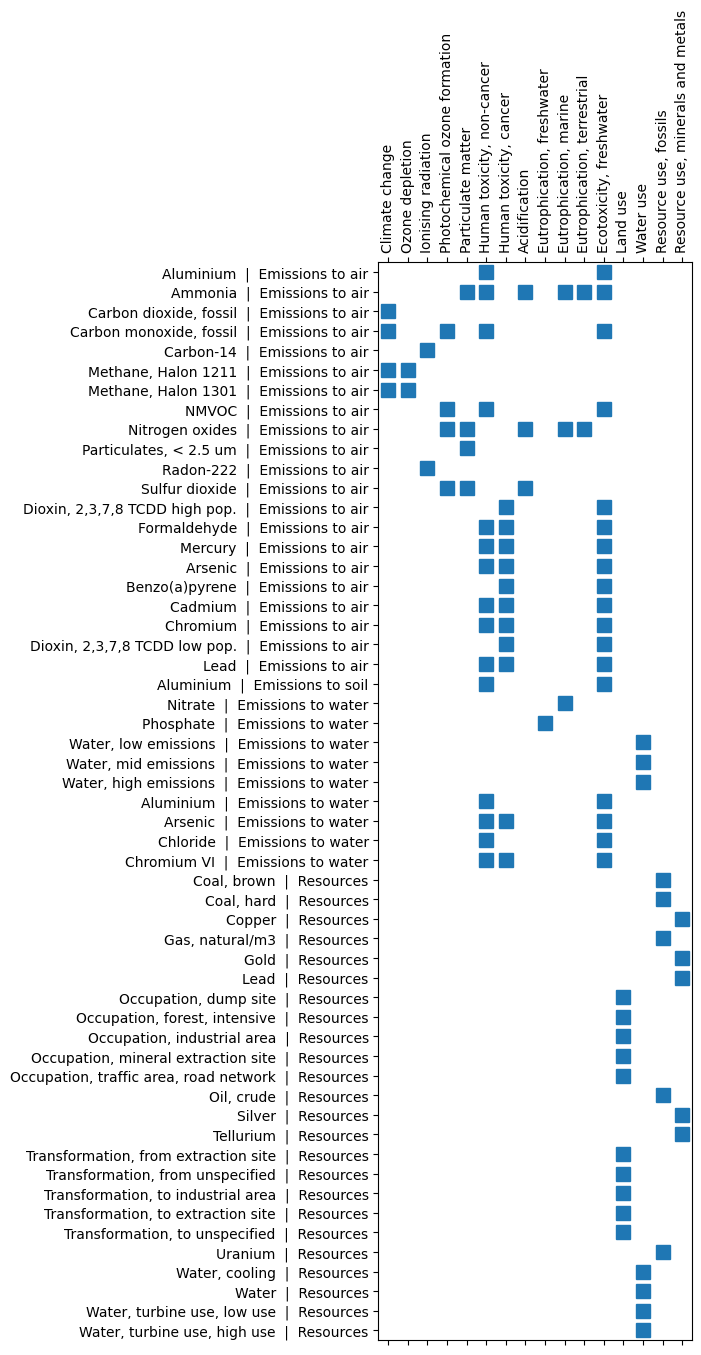

CHARACTERIZATION: Lignes x Colonnes = 55 x 16



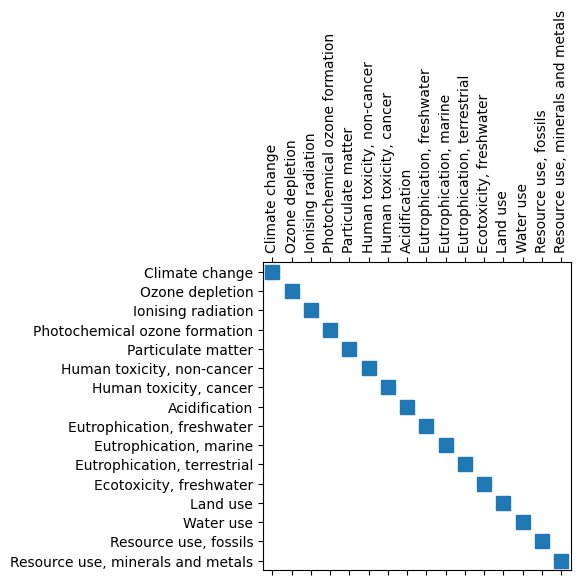

NORMALIZATION: Lignes x Colonnes = 16 x 16



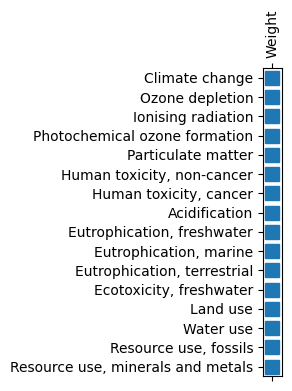

WEIGHTING: Lignes x Colonnes = 16 x 1



In [3]:
## Vecteur des procédés de premier plan
fig, ax = plt.subplots()
plt.spy(np.asarray([FOREGROUND_base]), markersize=10)
fig.set_size_inches(5,5)
x_labels = df_MODEL.index.get_level_values(0)
y_labels = ['Flux de référence']
ax.set_xticks(list(range(len(x_labels))))
ax.set_yticks(list(range(len(y_labels))))
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
plt.xticks(rotation = 90)
plt.show()
print('FOREGROUND: Lignes x Colonnes = {} x {}\n'.format(len(y_labels), len(x_labels)))

## Matrice de modélisation des procédés de premier plan
fig, ax = plt.subplots()
plt.spy(MODEL, markersize=10)
fig.set_size_inches(5,5)
x_labels = df_MODEL.columns.get_level_values(0)
y_labels = df_MODEL.index.get_level_values(0)
ax.set_xticks(list(range(len(x_labels))))
ax.set_yticks(list(range(len(y_labels))))
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
plt.xticks(rotation = 90)
plt.show()
print('MODEL: Lignes x Colonnes = {} x {}\n'.format(len(y_labels), len(x_labels)))

## Matrice de l'inventaire des flux élémentaires (émissions de polluants et extractions de ressources)
## provenant de la base de données
fig, ax = plt.subplots()
plt.spy(df_FLOWS, markersize=10)
fig.set_size_inches(14,14)
x_labels = df_FLOWS.columns.get_level_values(0)
y_labels = df_FLOWS.index.get_level_values(0)
ax.set_xticks(list(range(len(x_labels))))
ax.set_yticks(list(range(len(y_labels))))
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
plt.xticks(rotation = 90)
plt.show()
print('FLOWS: Lignes x Colonnes = {} x {}\n'.format(len(y_labels), len(x_labels)))

## Matrice de caractérisation des impacts fournie par la méthode EF 3.0
fig, ax = plt.subplots()
plt.spy(CHARACTERIZATION, markersize=10)
fig.set_size_inches(10,14)
x_labels = df_CHARACTERIZATION.columns.get_level_values(0)
y_labels = df_CHARACTERIZATION.index.get_level_values(0)
ax.set_xticks(list(range(len(x_labels))))
ax.set_yticks(list(range(len(y_labels))))
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
plt.xticks(rotation = 90)
plt.show()
print('CHARACTERIZATION: Lignes x Colonnes = {} x {}\n'.format(len(y_labels), len(x_labels)))

## Matrice de la normalisation des impacts fournie par la méthode EF 3.0
fig, ax = plt.subplots()
plt.spy(np.diag(NORMALIZATION[:,0]), markersize=10)
fig.set_size_inches(4,4)
x_labels = df_NORMALIZATION.index.get_level_values(0)
y_labels = df_NORMALIZATION.index.get_level_values(0)
ax.set_xticks(list(range(len(x_labels))))
ax.set_yticks(list(range(len(y_labels))))
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
plt.xticks(rotation = 90)
plt.show()
print('NORMALIZATION: Lignes x Colonnes = {} x {}\n'.format(len(y_labels), len(x_labels)))

## Matrice de pondération des impacts fournie par la méthode EF 3.0
fig, ax = plt.subplots()
plt.spy(np.asarray([WEIGHTING]).T, markersize=10)
fig.set_size_inches(4,4)
x_labels = df_WEIGHTING.columns.get_level_values(0)
y_labels = df_WEIGHTING.index.get_level_values(0)
ax.set_xticks(list(range(len(x_labels))))
ax.set_yticks(list(range(len(y_labels))))
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
plt.xticks(rotation = 90)
plt.show()
print('WEIGHTING: Lignes x Colonnes = {} x {}\n'.format(len(y_labels), len(x_labels)))

### **2.2 Quantification des procédés d'avant-plan**

*Cette cellule définit la quantité des procédés d'avant-plan (ex : procédés de fabrication, transport, utilisation d'énergie ...) par rapport au flux de référence qui répond à l'unité fonctionnelle. Cette composition est définie par le vecteur "FOREGROUND" qui pourra être modifié pour **les différents scénarios** de l'ACV.*

***À modifier*** *(quand c'est utile) pour évaluer l'effet d'une variation du flux de référence sur les résultats de l'ACV. N'hésitez pas à sauvegarder les résultats obtenus pour les différents scénarios afin de faciliter vos comparaisons et analyses.*
*Ne pas oublier de remettre les **valeurs par défauts** avant d'évaluer un nouveau scénario.*

In [4]:
## Quantités des procédés d'avant-plan
FOREGROUND = np.array([ 0.100,                  # Batterie [kg]                                       base = 0.100
                        0.009,                  # Composants électroniques actifs [kg]                base = 0.009
                        0.022,                  # Composants électroniques passifs [kg]               base = 0.022
                        0.025,                  # Composants électroniques PCB [kg]                   base = 0.025
                        0.055,                  # Pièces métalliques [kg]                             base = 0.055
                        0.035,                  # Pièces plastiques [kg]                              base = 0.035
                        0.246,                  # Importation [kg]                                    base = 0.246
                        40,                     # Collecte en magasin [km]                            base = 40
                        0,                      # Livraison [kg.km]                                   base = 0
                        2.871,                  # Utilisation en Belgique [MJ]                        base = 2.871
                        0,                      # Utilisation en Pologne [MJ]                         base = 0
                        0.100,                  # Traitement de la batterie [kg]                      base = 0.100
                        0.055,                  # Incinération des pièces métalliques [kg]            base = 0.055
                        0.035,                  # Incinération des pièces plastiques [kg]             base = 0.035
                        0.009+0.022+0.025,      # Incinération des composants électroniques [kg]      base = 0.009+0.022+0.025
                        0,                      # Recyclage des pièces métalliques [kg]               base = 0
                        0,                      # Recyclage des pièces plastiques [kg]                base = 0
                        0 ])                    # Recyclage des composants électroniques [kg]         base = 0
print("Quantités des procédés d'avant-plan :\n",FOREGROUND)

Quantités des procédés d'avant-plan :
 [1.000e-01 9.000e-03 2.200e-02 2.500e-02 5.500e-02 3.500e-02 2.460e-01
 4.000e+01 0.000e+00 2.871e+00 0.000e+00 1.000e-01 5.500e-02 3.500e-02
 5.600e-02 0.000e+00 0.000e+00 0.000e+00]


In [5]:
#utilisation en pologne
FOREGROUND1 = np.array([ 0.100,                  # Batterie [kg]                                       base = 0.100
                        0.009,                  # Composants électroniques actifs [kg]                base = 0.009
                        0.022,                  # Composants électroniques passifs [kg]               base = 0.022
                        0.025,                  # Composants électroniques PCB [kg]                   base = 0.025
                        0.055,                  # Pièces métalliques [kg]                             base = 0.055
                        0.035,                  # Pièces plastiques [kg]                              base = 0.035
                        0.246,                  # Importation [kg]                                    base = 0.246
                        40,                     # Collecte en magasin [km]                            base = 40
                        0,                      # Livraison [kg.km]                                   base = 0
                        2.871,                  # Utilisation en Belgique [MJ]                        base = 2.871
                        2.871,                      # Utilisation en Pologne [MJ]                         base = 0
                        0.100,                  # Traitement de la batterie [kg]                      base = 0.100
                        0.055,                  # Incinération des pièces métalliques [kg]            base = 0.055
                        0.035,                  # Incinération des pièces plastiques [kg]             base = 0.035
                        0.009+0.022+0.025,      # Incinération des composants électroniques [kg]      base = 0.009+0.022+0.025
                        0,                      # Recyclage des pièces métalliques [kg]               base = 0
                        0,                      # Recyclage des pièces plastiques [kg]                base = 0
                        0 ])                    # Recyclage des composants électroniques [kg]         base = 0
print("Quantités des procédés d'avant-plan :\n",FOREGROUND)

Quantités des procédés d'avant-plan :
 [1.000e-01 9.000e-03 2.200e-02 2.500e-02 5.500e-02 3.500e-02 2.460e-01
 4.000e+01 0.000e+00 2.871e+00 0.000e+00 1.000e-01 5.500e-02 3.500e-02
 5.600e-02 0.000e+00 0.000e+00 0.000e+00]


In [6]:
#livraison
FOREGROUND2 = np.array([ 0.100,                  # Batterie [kg]                                       base = 0.100
                        0.009,                  # Composants électroniques actifs [kg]                base = 0.009
                        0.022,                  # Composants électroniques passifs [kg]               base = 0.022
                        0.025,                  # Composants électroniques PCB [kg]                   base = 0.025
                        0.055,                  # Pièces métalliques [kg]                             base = 0.055
                        0.035,                  # Pièces plastiques [kg]                              base = 0.035
                        0.246,                  # Importation [kg]                                    base = 0.246
                        0,                     # Collecte en magasin [km]                            base = 40
                        40,                      # Livraison [kg.km]                                   base = 0
                        2.871,                  # Utilisation en Belgique [MJ]                        base = 2.871
                        0,                      # Utilisation en Pologne [MJ]                         base = 0
                        0.100,                  # Traitement de la batterie [kg]                      base = 0.100
                        0.055,                  # Incinération des pièces métalliques [kg]            base = 0.055
                        0.035,                  # Incinération des pièces plastiques [kg]             base = 0.035
                        0.009+0.022+0.025,      # Incinération des composants électroniques [kg]      base = 0.009+0.022+0.025
                        0,                      # Recyclage des pièces métalliques [kg]               base = 0
                        0,                      # Recyclage des pièces plastiques [kg]                base = 0
                        0 ])                    # Recyclage des composants électroniques [kg]         base = 0
print("Quantités des procédés d'avant-plan :\n",FOREGROUND)

Quantités des procédés d'avant-plan :
 [1.000e-01 9.000e-03 2.200e-02 2.500e-02 5.500e-02 3.500e-02 2.460e-01
 4.000e+01 0.000e+00 2.871e+00 0.000e+00 1.000e-01 5.500e-02 3.500e-02
 5.600e-02 0.000e+00 0.000e+00 0.000e+00]


### **2.3 Caractérisation des impacts**

*Cette cellule calcule et affiche les valeurs d'impacts pour tous les indicateurs environnementaux de la méthode EF 3.0. Ensuite, elle affiche le graphe de caractérisation qui montre la contribution des différents procédés impliqués dans l'ACV  (Batterie, Composants électroniques, Pièces métalliques et plastiques, Collecte, Utilisation, Traitement, Recyclage, ...) pour chaque catégorie d'impacts.*

***Rien à modifier.***

RESULTATS:
32.01	kg CO2 eq	Climate change
0.00	kg CFC11 eq	Ozone depletion
3.82	kBq U-235 eq	Ionising radiation
0.06	kg NMVOC eq	Photochemical ozone formation
0.00	disease inc.	Particulate matter
0.00	CTUh		Human toxicity, non-cancer
0.00	CTUh		Human toxicity, cancer
0.07	mol H+ eq	Acidification
0.03	kg P eq		Eutrophication, freshwater
0.02	kg N eq		Eutrophication, marine
0.25	mol N eq	Eutrophication, terrestrial
1513.02	CTUe		Ecotoxicity, freshwater
157.91	Pt		Land use
6.75	m3 depriv.	Water use
468.26	MJ		Resource use, fossils
0.01	kg Sb eq	Resource use, minerals and metals



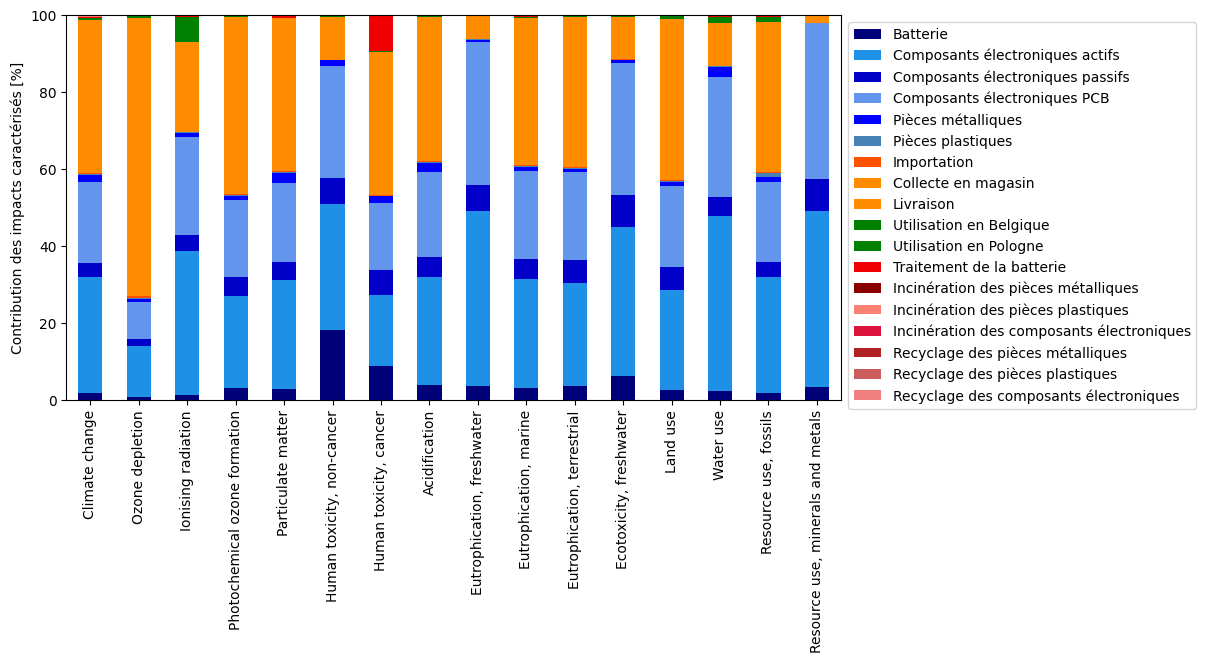

RESULTATS:
32.78	kg CO2 eq	Climate change
0.00	kg CFC11 eq	Ozone depletion
3.85	kBq U-235 eq	Ionising radiation
0.06	kg NMVOC eq	Photochemical ozone formation
0.00	disease inc.	Particulate matter
0.00	CTUh		Human toxicity, non-cancer
0.00	CTUh		Human toxicity, cancer
0.07	mol H+ eq	Acidification
0.03	kg P eq		Eutrophication, freshwater
0.02	kg N eq		Eutrophication, marine
0.25	mol N eq	Eutrophication, terrestrial
1522.83	CTUe		Ecotoxicity, freshwater
159.35	Pt		Land use
7.01	m3 depriv.	Water use
477.27	MJ		Resource use, fossils
0.01	kg Sb eq	Resource use, minerals and metals



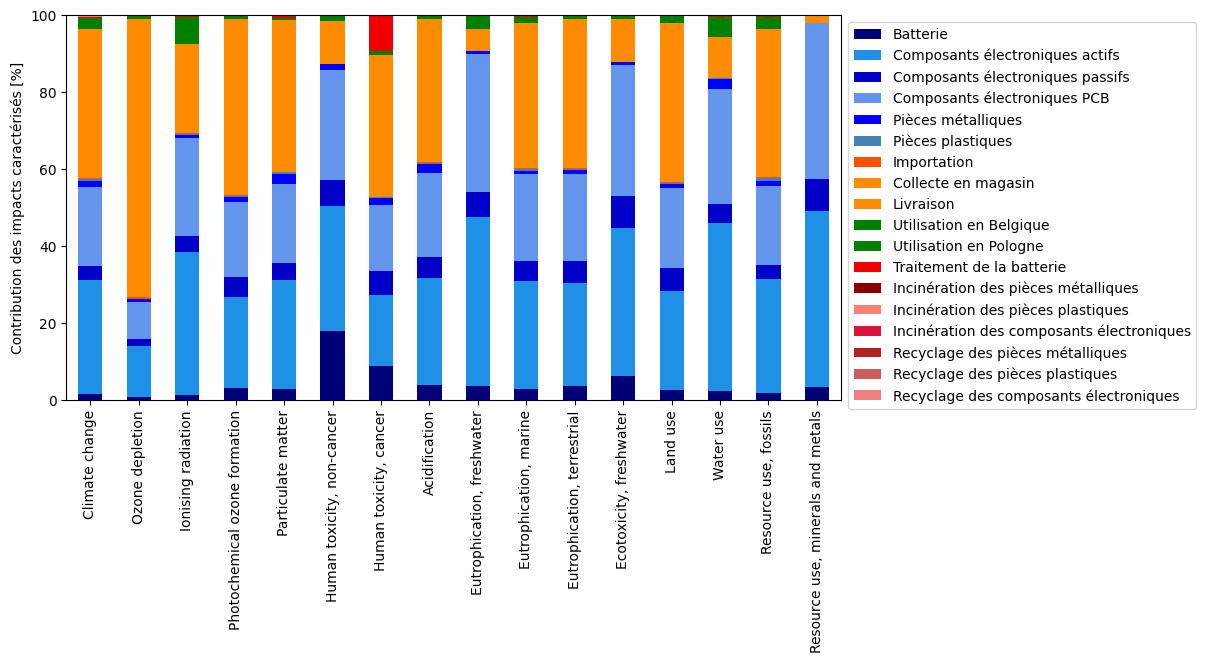

RESULTATS:
19.41	kg CO2 eq	Climate change
0.00	kg CFC11 eq	Ozone depletion
2.94	kBq U-235 eq	Ionising radiation
0.03	kg NMVOC eq	Photochemical ozone formation
0.00	disease inc.	Particulate matter
0.00	CTUh		Human toxicity, non-cancer
0.00	CTUh		Human toxicity, cancer
0.05	mol H+ eq	Acidification
0.03	kg P eq		Eutrophication, freshwater
0.01	kg N eq		Eutrophication, marine
0.15	mol N eq	Eutrophication, terrestrial
1345.87	CTUe		Ecotoxicity, freshwater
92.34	Pt		Land use
6.00	m3 depriv.	Water use
286.72	MJ		Resource use, fossils
0.01	kg Sb eq	Resource use, minerals and metals



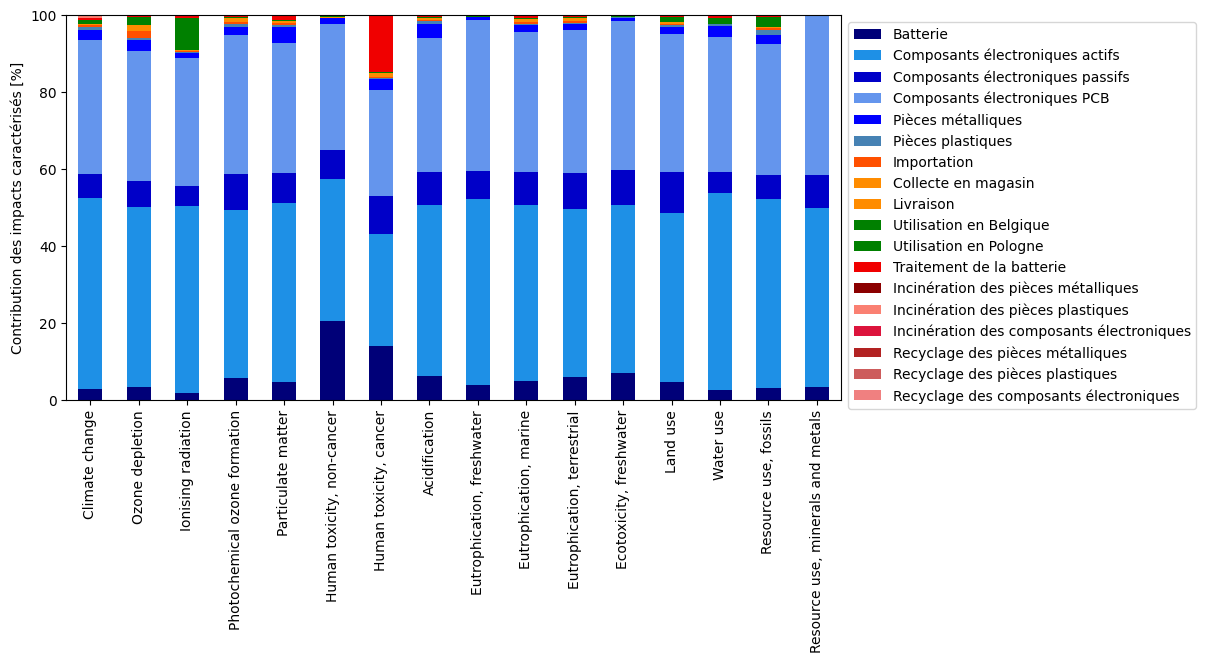

In [7]:
## Caractérisation des impacts
IMPACTS = np.diag(FOREGROUND) @ MODEL @ FLOWS @ CHARACTERIZATION

## Affichage des valeurs absolues des impacts caractérisés
impacts_sum = np.sum(IMPACTS,axis=0)
impacts_text = ["%.2f" % x for x in impacts_sum]
impacts_unit = np.array(df_CHARACTERIZATION.columns.get_level_values(1), dtype='U')
impacts_name = np.array(df_CHARACTERIZATION.columns.get_level_values(0), dtype='U')
tabs = np.array(['\t','\t','\t','\t','\t','\t\t','\t\t','\t','\t\t','\t\t','\t','\t\t','\t\t','\t','\t\t','\t'])
D = np.char.add(np.char.add(np.char.add(np.char.add(np.char.add(impacts_text,'\t'),impacts_unit),tabs),impacts_name),'\n')
print('RESULTATS:')
print(''.join(D.tolist()))

## Graphe de contribution des impacts caractérisés
df_IMPACTS = pd.DataFrame(100*IMPACTS.T/np.sum(IMPACTS,axis=0)[:,None],columns=np.array(df_MODEL.index.get_level_values(0)),index=df_CHARACTERIZATION.columns.get_level_values(0))
df_IMPACTS.plot(kind='bar', stacked=True, figsize=(10, 5), cmap=custom_cmp)
plt.ylim(0,100)
plt.ylabel('Contribution des impacts caractérisés [%]')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

IMPACTS = np.diag(FOREGROUND1) @ MODEL @ FLOWS @ CHARACTERIZATION

## Affichage des valeurs absolues des impacts caractérisés
impacts_sum = np.sum(IMPACTS,axis=0)
impacts_text = ["%.2f" % x for x in impacts_sum]
impacts_unit = np.array(df_CHARACTERIZATION.columns.get_level_values(1), dtype='U')
impacts_name = np.array(df_CHARACTERIZATION.columns.get_level_values(0), dtype='U')
tabs = np.array(['\t','\t','\t','\t','\t','\t\t','\t\t','\t','\t\t','\t\t','\t','\t\t','\t\t','\t','\t\t','\t'])
D = np.char.add(np.char.add(np.char.add(np.char.add(np.char.add(impacts_text,'\t'),impacts_unit),tabs),impacts_name),'\n')
print('RESULTATS:')
print(''.join(D.tolist()))

## Graphe de contribution des impacts caractérisés
df_IMPACTS = pd.DataFrame(100*IMPACTS.T/np.sum(IMPACTS,axis=0)[:,None],columns=np.array(df_MODEL.index.get_level_values(0)),index=df_CHARACTERIZATION.columns.get_level_values(0))
df_IMPACTS.plot(kind='bar', stacked=True, figsize=(10, 5), cmap=custom_cmp)
plt.ylim(0,100)
plt.ylabel('Contribution des impacts caractérisés [%]')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

IMPACTS = np.diag(FOREGROUND2) @ MODEL @ FLOWS @ CHARACTERIZATION

## Affichage des valeurs absolues des impacts caractérisés
impacts_sum = np.sum(IMPACTS,axis=0)
impacts_text = ["%.2f" % x for x in impacts_sum]
impacts_unit = np.array(df_CHARACTERIZATION.columns.get_level_values(1), dtype='U')
impacts_name = np.array(df_CHARACTERIZATION.columns.get_level_values(0), dtype='U')
tabs = np.array(['\t','\t','\t','\t','\t','\t\t','\t\t','\t','\t\t','\t\t','\t','\t\t','\t\t','\t','\t\t','\t'])
D = np.char.add(np.char.add(np.char.add(np.char.add(np.char.add(impacts_text,'\t'),impacts_unit),tabs),impacts_name),'\n')
print('RESULTATS:')
print(''.join(D.tolist()))

## Graphe de contribution des impacts caractérisés
df_IMPACTS = pd.DataFrame(100*IMPACTS.T/np.sum(IMPACTS,axis=0)[:,None],columns=np.array(df_MODEL.index.get_level_values(0)),index=df_CHARACTERIZATION.columns.get_level_values(0))
df_IMPACTS.plot(kind='bar', stacked=True, figsize=(10, 5), cmap=custom_cmp)
plt.ylim(0,100)
plt.ylabel('Contribution des impacts caractérisés [%]')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

### **2.4 Normalisation des impacts**

*Cette cellule calcule et affiche les valeurs normalisées d'impacts pour tous les indicateurs environnementaux considérés par la méthode. Ensuite, elle affiche le graphe de normalisation pour toutes les catégories d'impacts.*

***À modifier*** *pour adapter les facteurs de normalisation.*

RESULTATS:
0.0197  person 	Climate change
0.0000  person 	Ozone depletion
0.0000  person 	Ionising radiation
0.0006  person 	Photochemical ozone formation
0.0128  person 	Particulate matter
0.0013  person 	Human toxicity, non-cancer
0.0001  person 	Human toxicity, cancer
0.0003  person 	Acidification
0.0353  person 	Eutrophication, freshwater
0.0005  person 	Eutrophication, marine
0.0002  person 	Eutrophication, terrestrial
0.0708  person 	Ecotoxicity, freshwater
0.0068  person 	Land use
0.0002  person 	Water use
0.0088  person 	Resource use, fossils
0.2541  person 	Resource use, minerals and metals



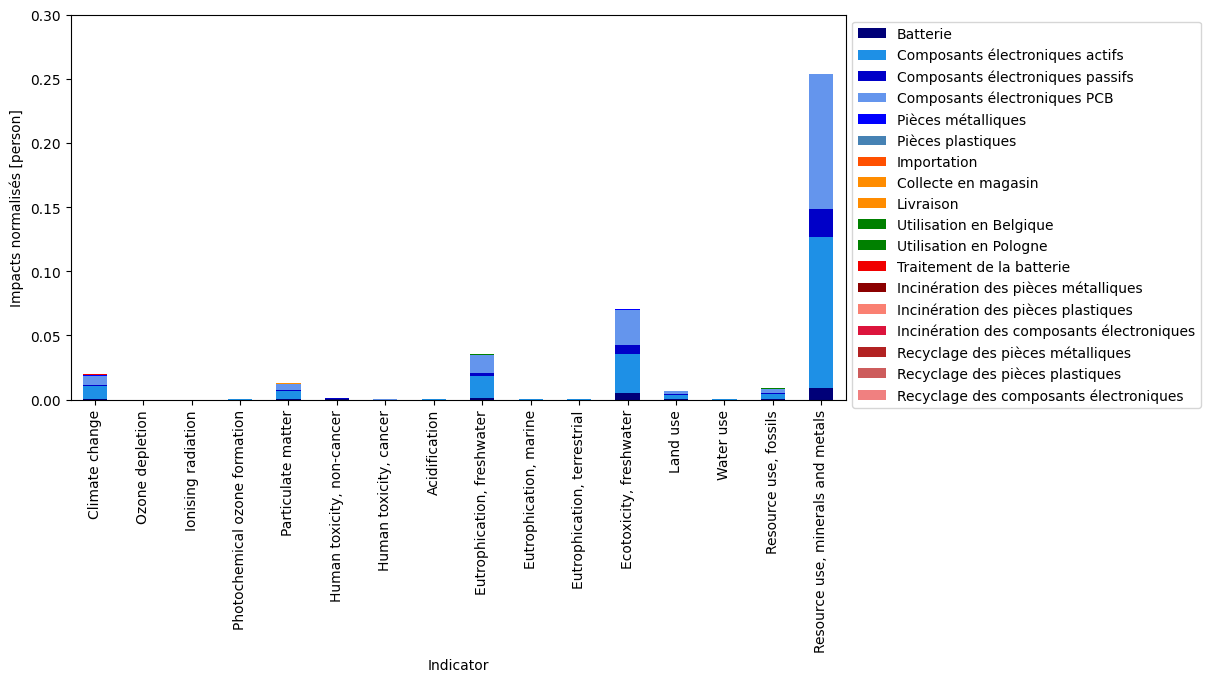

In [8]:
## Normalisation des impacts
Normalization_factor = 1./NORMALIZATION[:,1]  # CHANGER ici les facteurs de normalisation
IMPACTS_NORM = IMPACTS @ np.diag(Normalization_factor)

## Affichage des impacts normalisés
impacts_sum = np.sum(IMPACTS_NORM,axis=0)
impacts_text = ["%.4f" % x for x in impacts_sum]
D = np.char.add(np.char.add(np.char.add(impacts_text,'  person \t'),impacts_name),'\n')
print('RESULTATS:')
print(''.join(D.tolist()))

## Graphe des impacts normalisés
df_IMPACTS = pd.DataFrame(IMPACTS_NORM.T,columns=np.array(df_MODEL.index.get_level_values(0)),index=df_NORMALIZATION.index.get_level_values(0))
df_IMPACTS.plot(kind='bar', stacked=True, figsize=(10, 5), cmap=custom_cmp)
plt.ylim(0,0.3)
plt.ylabel('Impacts normalisés [person]')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

### **2.5 Pondération et agrégation des impacts**

*Cette cellule affiche les valeurs des poids de tous les indicateurs environnementaux. Par défaut, elle considère la pondération définie par la méthode EF 3.0.*

***À modifier*** *pour adapter les facteurs de pondération (çàd les poids de chaque catégorie d'impact).*

Somme des poids:  1.000



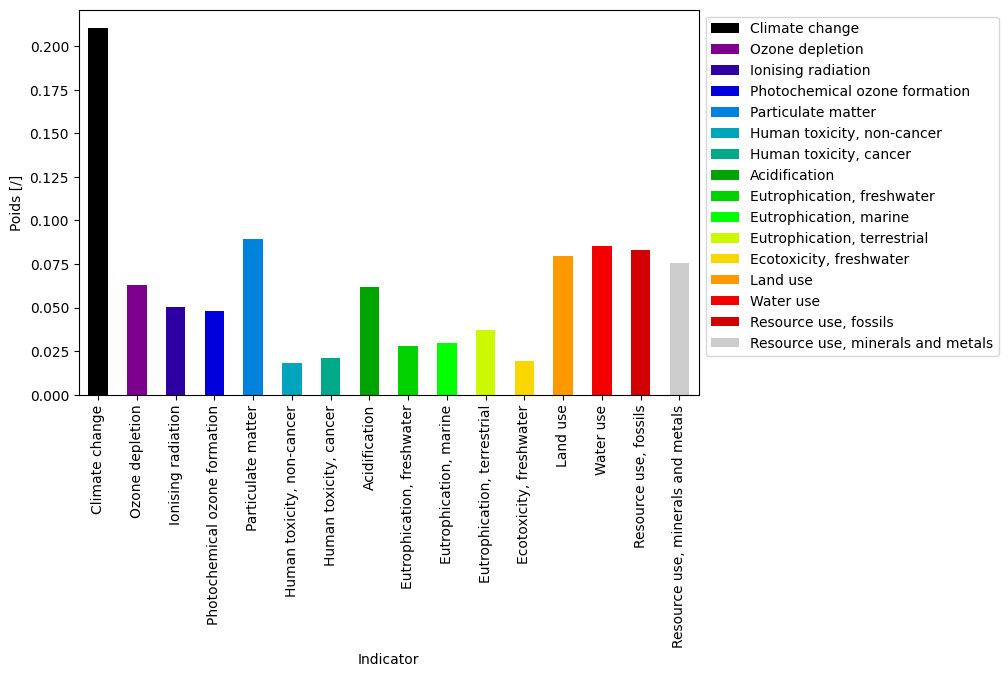

In [9]:
## Graphe des facteurs de pondération
WEIGHTS = WEIGHTING # CHANGER ici les facteurs de pondération
df_WEIGHTS = pd.DataFrame(np.diag(WEIGHTS),index=df_WEIGHTING.index.get_level_values(0),columns=df_WEIGHTING.index.get_level_values(0))
df_WEIGHTS.plot(kind='bar', stacked=True, figsize=(8, 5), cmap=plt.colormaps.get_cmap('nipy_spectral'))

## Affichage des impacts pondérés
print("Somme des poids:  "+"%.3f" % np.sum(WEIGHTS)+"\n")

plt.ylabel('Poids [/]')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

*Cette cellule calcule et affiche le graphe des impacts pondérés et agrégés selon un score unique avec le détail des contributions de chaque indicateur environnemental.*

***Rien à modifier.***

SCORE UNIQUE:  0.0282 Pt



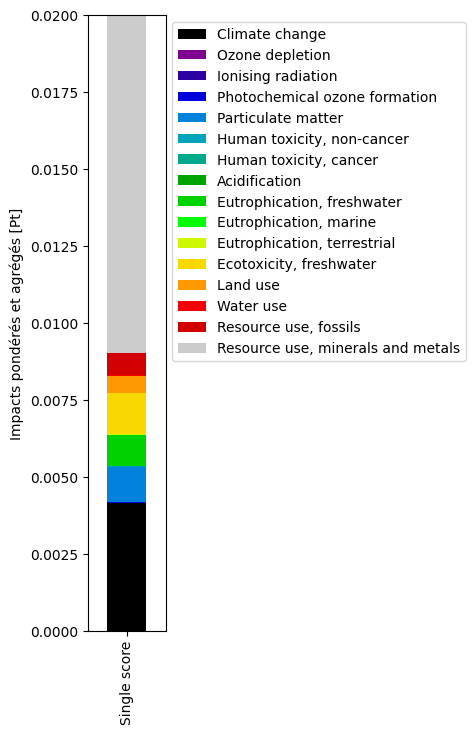

In [10]:
## Pondération et agrégation des impacts
IMPACTS_WEIGHT = np.sum(IMPACTS_NORM, axis=0)*WEIGHTS

## Affichage des impacts pondérés
print("SCORE UNIQUE:  "+"%.4f" % np.sum(IMPACTS_WEIGHT)+" Pt\n")

## Graphe des impacts pondérés
df_IMPACTS = pd.DataFrame(IMPACTS_WEIGHT.reshape((1, -1)),index=['Single score'],columns=df_NORMALIZATION.index.get_level_values(0))
df_IMPACTS.plot(kind='bar', stacked=True, figsize=(1, 8), cmap=plt.colormaps.get_cmap('nipy_spectral'))
plt.ylabel('Impacts pondérés et agrégés [Pt]')
plt.ylim(0,0.020)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# **3. Analyse de sensibilité**

*Cette cellule produit le graphe d'analyse de sensibilité de l'ACV selon la méthode de Monte-Carlo en faisant varier plusieurs paramètres:*
- *variation de l'utilisation du drone selon une distribution log-normale de moyenne $\mu_1$ et de déviation $\sigma_1$.*
- *variation de la distance parcourue pour la collecte du drone (à implémenter).*
- *variation du taux de recyclage du drone (à implémenter).*

***À modifier.***

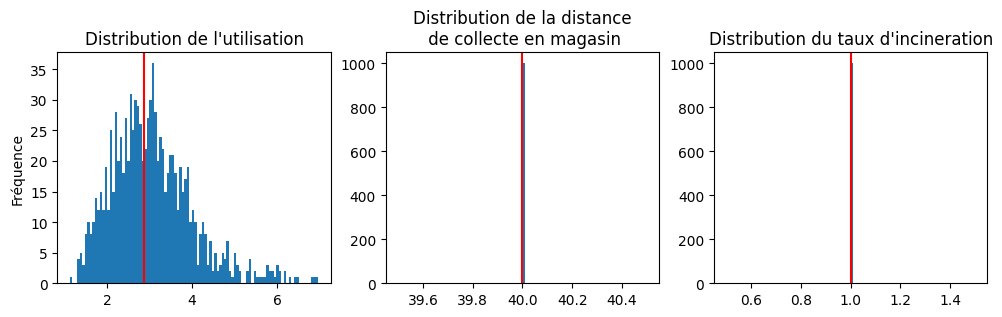

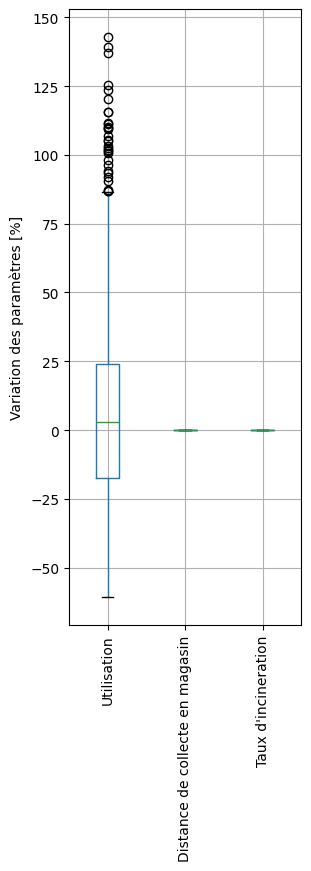

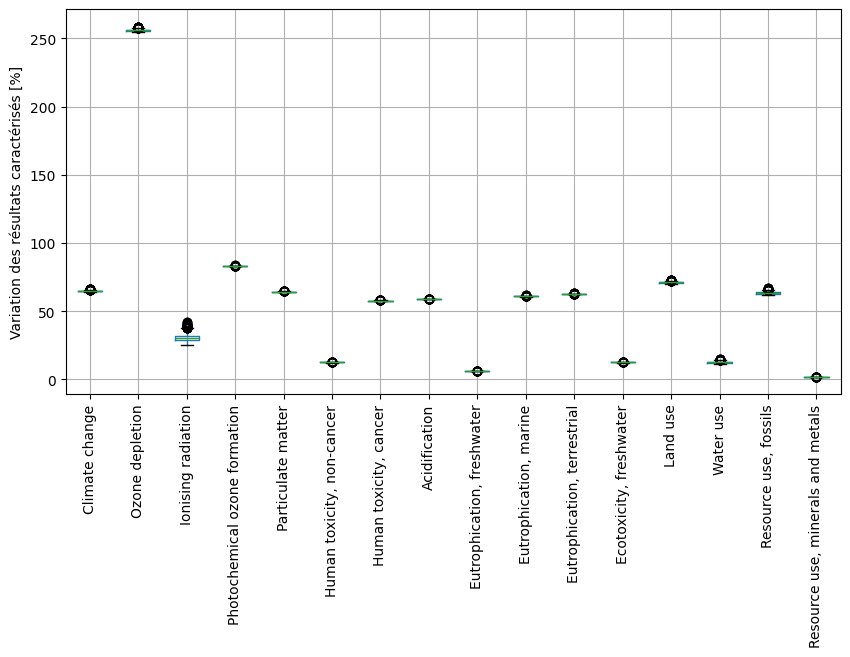

In [11]:
## Initialisation de la méthode de Monte-Carlo
rep = 1000
IMPACTS_variation = np.zeros((CHARACTERIZATION.shape[1],rep))

## Variation de l'utilisation
mu1 = np.log(2.871)                 # median = scénario de référence
sigma1 = 0.3                        # variation autour de la moyenne
s1 = np.random.lognormal(mu1, sigma1, rep) # Variation de l'utilisation suivant une distribution log-normale

## Autres variations possible
mu2 = 40
s2 = mu2*np.ones(rep)         # A IMPLEMENTER : faire varier la distance parcourue pour la collecte
mu3 = 1
s3 = mu3*np.ones(rep)         # A IMPLEMENTER : faire varier le taux de recyclage
# ...

for i in range(rep):
  ## Variation de la composition du flux de référence
  FOREGROUND_rnd = np.array([ 0.100,                                # Batterie [kg]
                              0.009,                                # Composants électroniques actifs [kg]
                              0.022,                                # Composants électroniques passifs [kg]
                              0.025,                                # Composants électroniques PCB [kg]
                              0.055,                                # Pièces métalliques [kg]
                              0.035,                                # Pièces plastiques [kg]
                              0.246,                                # Importation [kg]
                              s2[i],                                # Collecte en magasin [km]
                              0,                                    # Livraison [kg.km]
                              s1[i],                                # Utilisation en Belgique [MJ]
                              0,                                    # Utilisation en Pologne [MJ]
                              s3[i]*0.100,                          # Traitement de la batterie [kg]
                              s3[i]*0.055,                          # Incinération des pièces métalliques [kg]
                              s3[i]*0.035,                          # Incinération des pièces plastiques [kg]
                              s3[i]*(0.009+0.022+0.025),            # Incinération des composants électroniques [kg]
                              (1-s3[i])*0.100,                      # Recyclage des pièces métalliques [kg]
                              (1-s3[i])*0.055,                      # Recyclage des pièces plastiques [kg]
                              (1-s3[i])*(0.009+0.022+0.025) ])      # Recyclage des composants électroniques [kg]

  ## Caractérisation des impacts et variation de ceux-ci par rapport au scénario initial (défini à la cellule 2.1)
  IMPACTS_variation[:,i] = np.sum(np.diag(FOREGROUND_rnd) @ MODEL @ FLOWS @ CHARACTERIZATION, axis=0)/np.sum(IMPACTS,axis=0)-1

## Graphe de distributions pour les paramètres
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))

ax1.hist(s1, 100, align='mid')
ax1.axvline(x = FOREGROUND[9], color = 'r',)
ax1.set_title("Distribution de l'utilisation")
ax1.set_ylabel('Fréquence')

ax2.hist(s2, 100, align='mid')
ax2.axvline(x = FOREGROUND[7], color = 'r',)
ax2.set_title('Distribution de la distance\n de collecte en magasin')

ax3.hist(s3, 100, align='mid')
ax3.axvline(x = 1, color = 'r',)
ax3.set_title("Distribution du taux d'incineration")
plt.show()

## Graphe de variation des paramètres
df_PARAMS_variation = pd.DataFrame(100*(np.array([s1/FOREGROUND[9], s2/FOREGROUND[7], s3/1]).T-1),columns=['Utilisation','Distance de collecte en magasin',"Taux d'incineration"])
df_PARAMS_variation.boxplot(figsize=(3, 8))
plt.tick_params(axis='x', labelrotation=90)
plt.ylabel('Variation des paramètres [%]')
plt.show()
print("\n")

## Graphe de sensibilité des impacts
df_IMPACTS_variation = pd.DataFrame(100*IMPACTS_variation.T,columns=df_NORMALIZATION.index.get_level_values(0))
df_IMPACTS_variation.boxplot(figsize=(10, 5))
plt.tick_params(axis='x', labelrotation=90)
plt.ylabel('Variation des résultats caractérisés [%]')
plt.show()